In [1]:
import sympy as sp
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

In [2]:
x, y, m, n, a, b, ν, G, J = sp.symbols('x y m n a b nu G J')
Φmn = sp.symbols('Phimn', cls=sp.Function)

In [3]:
Φmn = - ν/(1 + ν)/J*8*b**3 / sp.pi**4*(-1)**(m+n-1)*sp.cos((2*m+1)/(2*a)*sp.pi*x)*sp.sin(n*sp.pi*y/b)/((2*m+1)*n*((2*m+1)**2*b**2/(4*a**2)+n**2))

In [4]:
Φmn

-8*(-1)**(m + n - 1)*b**3*nu*sin(pi*n*y/b)*cos(pi*x*(2*m + 1)/(2*a))/(pi**4*J*n*(2*m + 1)*(n**2 + b**2*(2*m + 1)**2/(4*a**2))*(nu + 1))

In [5]:
τxz = sp.diff(Φmn,y)
τyz = -sp.diff(Φmn,x)

In [6]:
τxz

-8*(-1)**(m + n - 1)*b**2*nu*cos(pi*x*(2*m + 1)/(2*a))*cos(pi*n*y/b)/(pi**3*J*(2*m + 1)*(n**2 + b**2*(2*m + 1)**2/(4*a**2))*(nu + 1))

In [7]:
sp.latex(τxz)

'- \\frac{8 \\left(-1\\right)^{m + n - 1} b^{2} \\nu \\cos{\\left(\\frac{\\pi x \\left(2 m + 1\\right)}{2 a} \\right)} \\cos{\\left(\\frac{\\pi n y}{b} \\right)}}{\\pi^{3} J \\left(2 m + 1\\right) \\left(n^{2} + \\frac{b^{2} \\left(2 m + 1\\right)^{2}}{4 a^{2}}\\right) \\left(\\nu + 1\\right)}'

In [7]:
τyz

-4*(-1)**(m + n - 1)*b**3*nu*sin(pi*x*(2*m + 1)/(2*a))*sin(pi*n*y/b)/(pi**3*J*a*n*(n**2 + b**2*(2*m + 1)**2/(4*a**2))*(nu + 1))

In [8]:
τxz_val = sp.lambdify((x,y,m,n,a,b,J,ν),τxz, 'numpy')

In [9]:
τyz_val = sp.lambdify((x,y,m,n,a,b,J,ν),τyz, 'numpy')

In [10]:
def ShearStresses(x_curr,y_curr, a_h, b_h, J, G1, ν1, num=101):
    
    τxz_acc = 0.5/J*(a_h**2 - x_curr**2)
    τyz_acc = 0.0
    
    # print("curr. x {0:.5f} - curr. y {1:.5f}".format(x_curr, y_curr))
    
    for m in range(num):
        for n in range(1,num):
            τxz_acc += τxz_val(x_curr, y_curr, m, n, a_h, b_h, J, ν1)
            τyz_acc += τyz_val(x_curr, y_curr, m, n, a_h, b_h, J, ν1)
    
    return τxz_acc, τyz_acc

In [16]:
a1 = 0.32
b1 = 0.16
J1 = 1/12.*(b1)*(a1)**3

E = 1
nu = 0.3
G = E/(2*(1+nu))

T = 1e-4

x = np.linspace(-a1/2, a1/2,45)

τ_xz_mid = np.zeros_like(x)
τ_xz_edge = np.zeros_like(x)
τ_yz_mid = np.zeros_like(x)
τ_yz_edge = np.zeros_like(x)

p1, p2 = ShearStresses(0, 0, a1/2, b1/2, J1, G, nu)
q1, q2 = ShearStresses(a1/2, 0, a1/2, b1/2, J1, G, nu)


for i, x_act in enumerate(x):
    # print("i: {0} y: {1}".format(i, y_act))
    p1, q1 = ShearStresses(x_act, 0, a1/2, b1/2, J1, G, nu)
    τ_xz_mid[i] = p1
    τ_yz_mid[i] = q1
    p1, q1 = ShearStresses(x_act, b1/2, a1/2, b1/2, J1, G, nu)
    τ_xz_edge[i] = p1
    τ_yz_edge[i] = q1



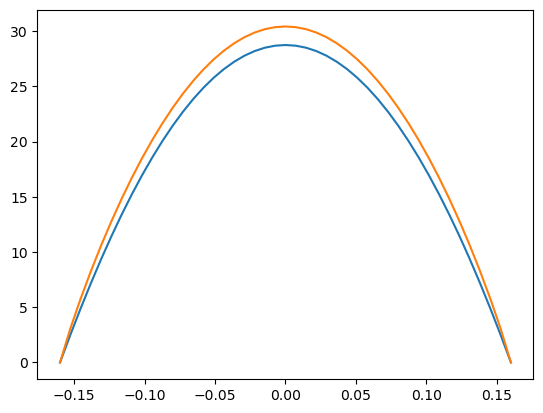

In [18]:
plt.figure()
plt.plot(x, τ_xz_mid)
plt.plot(x, τ_xz_edge)

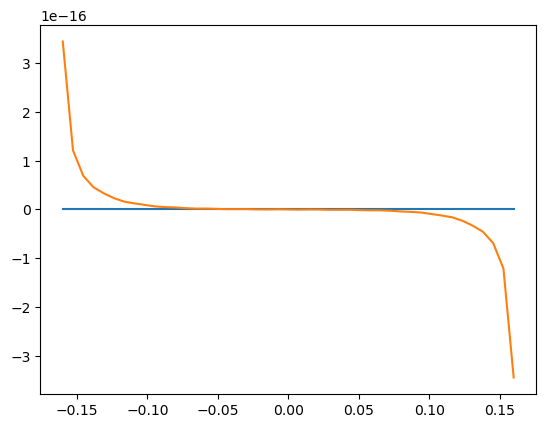

In [19]:
plt.figure()
plt.plot(x, τ_yz_mid)
plt.plot(x, τ_yz_edge)

In [14]:
q1

-4.0723237569369884e-18

In [15]:
q2

0.0